# Fitting Parameters for Virus Model

## Overview

 We will fit each of these patients separately, obtaining different values of parameters.
 This is an analysis of the influenza data.

### Influenza Data (Influenza.csv)

- 6 patients
- Viral levels in log10(TCID50 / ml of nasal wash)
- Measurements taken a successive days since volunteer exposure
- Columns are patients

### State variables

- $T$: number of target cells
- $E$: number of exposed cells (virus replicating inside, not yet spreading virus)
- $I$: number of infected cells (active virus production)
- $V$: viral titre, in units of TCID50/ml of biofluid wash (for Influenza)

### Baseline Model: $T \rightarrow E \rightarrow I \rightarrow \emptyset$
 $\frac{dT}{dt} = - \beta T V$
 
 $\frac{dE}{dt} =  \beta T V - \kappa E$
 
 $\frac{dI}{dt} = \kappa E - \delta I$
 
 $\frac{dV}{dt} = p y(I) - c y(V)$
 
### SIR Model: $T \rightarrow I \rightarrow \emptyset$
 $\frac{dT}{dt} = - \beta T V$
 
 $\frac{dI}{dt} = \beta T V - \delta I$
 
 $\frac{dV}{dt} = p y(I) - c y(V)$
 

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import SBstoat
from SBstoat.modelStudy import ModelStudy
%matplotlib inline

In [2]:
# Programming Constants Used in Analysis
USE_SERIALIZED = True  # Use saved data from a previous bootstrap (if present)
DO_SERIALIZE = False  # Update the serialized data
DIR = "/home/ubuntu/SBstoat/examples/virus"  # Directory where the data are
FILE_NAME = "Influenza.csv"
NUM_BOOTSTRAP_ITERATION = 20
VIRUS = "V"  # Name of the state variable that corresponds to the observed data

## Study for Baseline Model

In [3]:
ANTIMONY_MODEL  = '''
    // Equations
    E1: T -> E ; beta*T*V ; // Target cells to exposed
    E2: E -> I ; kappa*E ;  // Exposed cells to infected
    E3: -> V ; p*I ;        // Virus production by infected cells
    E4: V -> ; c*V ;        // Virus clearance
    E5: I -> ; delta*I      // Death of infected cells    

    // Parameters - from the Influenza article,
        
    beta = 3.2e-5;  // rate of transition of target(T) to exposed(E) cells, in units of 1/[V] * 1/day
    kappa = 4.0;    // rate of transition from exposed(E) to infected(I) cells, in units of 1/day
    delta = 5.2;    // rate of death of infected cells(I), in units of 1/day
    p = 4.6e-2;     // rate virus(V) producion by infected cells(I), in units of [V]/day
    c = 5.2;        // rate of virus clearance, in units of 1/day

    // Initial conditions
    T = 4E+8 // estimate of the total number of susceptible epithelial cells
             // in upper respiratory tract)
    E = 0
    I = 0
    V = 0.75 // the dose of virus in TCID50 in Influenza experiment; could be V=0 and I = 20 instead for a natural infection

'''

### 1. Data Setup
Create separate timeseries for each patient.

In [4]:
# Transform the input data into separate data sources.
path = os.path.join(DIR, FILE_NAME)
patients = ["P%d" % (p+1) for p in range(6)]
dataSourceDct = SBstoat.modelStudy.mkDataSourceDct(path, VIRUS,
                                                   dataSourceNames=patients)

In [5]:
# dataSourceDct is a python dictionary. The key is 'Pn', where n is the patient number.
# The value is a time series for that patient.
dataSourceDct

{'P1':         V
 time     
 0.0   2.0
 1.0   5.5
 2.0   4.0
 3.0   5.5
 4.0   3.0
 5.0   0.0
 6.0   0.0,
 'P2':         V
 time     
 0.0   1.0
 1.0   6.0
 2.0   3.0
 3.0   1.5
 4.0   3.5
 5.0   1.3
 6.0   0.0,
 'P3':         V
 time     
 0.0   2.5
 1.0   5.0
 2.0   5.0
 3.0   3.0
 4.0   5.5
 5.0   3.5
 6.0   0.0,
 'P4':         V
 time     
 0.0   3.5
 1.0   5.5
 2.0   6.5
 3.0   5.5
 4.0   3.5
 5.0   4.0
 6.0   0.0,
 'P5':         V
 time     
 0.0   2.5
 1.0   3.0
 2.0   6.5
 3.0   6.5
 4.0   2.0
 5.0   0.8
 6.0   0.0,
 'P6':         V
 time     
 0.0   4.0
 1.0   5.0
 2.0   5.5
 3.0   7.5
 4.0   5.5
 5.0   1.3
 6.0   0.0}

### 2. Transform the Simulation Results to Units of Observed Values
The observed values are in units of log10. So, simulation results must
be converted to these units. This is done by specifying a data transformation.
The data transformation is a function. It accepts as input the timeseries produced by the simulation;
the output is a numpy array.

In [6]:
def transformDataArr(timeseries):
    """
    Changes the timeseries to log units
    """
    arr = np.array([1 if v < 1 else v
          for v in timeseries[VIRUS]])
    return np.log10(arr)

### 3. Specify permissible values for parameters
For each parameter, provide a tuple of its: lower bound, upper bound, and starting value.

In [7]:
# Parameter value ranges: lower, upper, initial value
parameterDct = dict(
      beta=(0, 10e-5, 3.2e-5),
      kappa=(0, 10, 4.0),
      delta=(0, 10, 5.2),
      p=(0, 1, 4.6e-2),
      c=(0, 10, 5.2)
      )

### 4. Run the model and produce plots.



Doing bootstrapp for instance P1
5000 bootstrap estimates of parameters.


Doing bootstrapp for instance P2
8 bootstrap estimates of parameters.


Doing bootstrapp for instance P3
8 bootstrap estimates of parameters.


Doing bootstrapp for instance P4
2624 bootstrap estimates of parameters.


Doing bootstrapp for instance P5
516 bootstrap estimates of parameters.


Doing bootstrapp for instance P6
5000 bootstrap estimates of parameters.


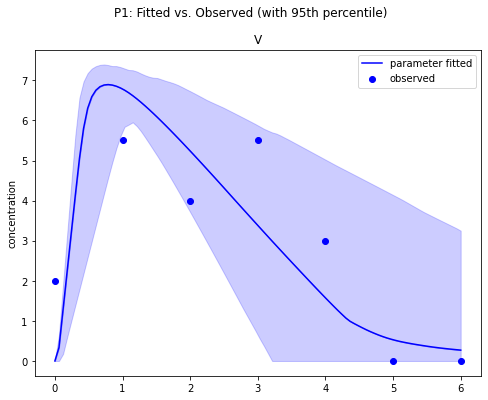

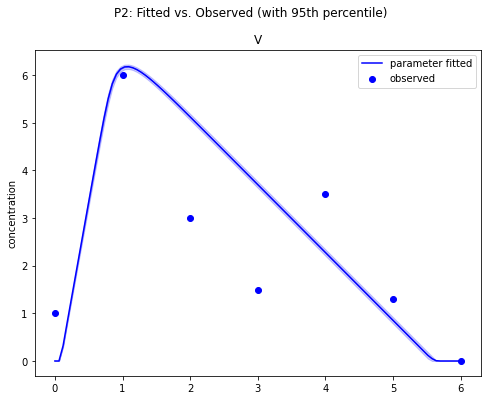

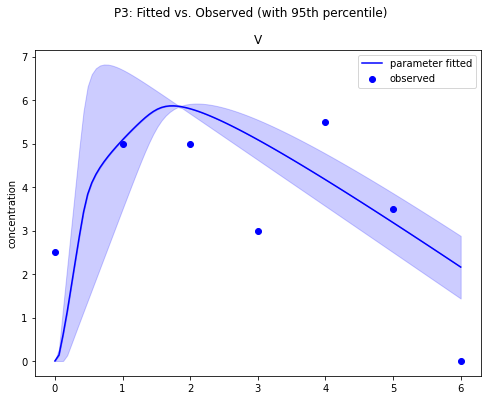

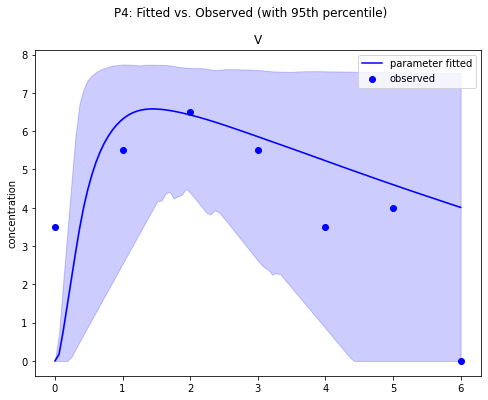

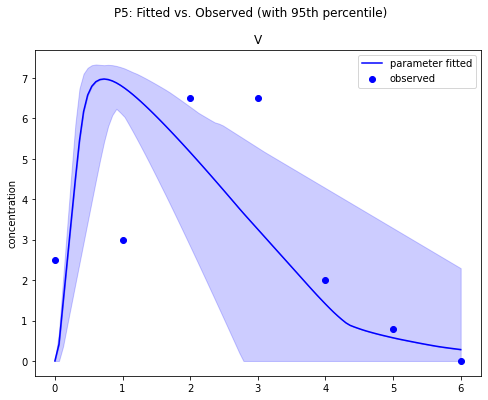

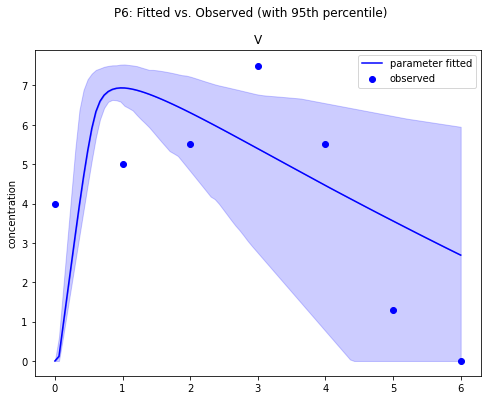

***Warning. Only 8 samples from bootstrap of P2.
            Unable to do plot for parameter beta.
***Warning. Only 8 samples from bootstrap of P2.
            Unable to do plot for parameter kappa.
***Warning. Only 8 samples from bootstrap of P2.
            Unable to do plot for parameter delta.
***Warning. Only 8 samples from bootstrap of P2.
            Unable to do plot for parameter p.
***Warning. Only 8 samples from bootstrap of P2.
            Unable to do plot for parameter c.
***Warning. Only 8 samples from bootstrap of P3.
            Unable to do plot for parameter beta.
***Warning. Only 8 samples from bootstrap of P3.
            Unable to do plot for parameter kappa.
***Warning. Only 8 samples from bootstrap of P3.
            Unable to do plot for parameter delta.
***Warning. Only 8 samples from bootstrap of P3.
            Unable to do plot for parameter p.
***Warning. Only 8 samples from bootstrap of P3.
            Unable to do plot for parameter c.


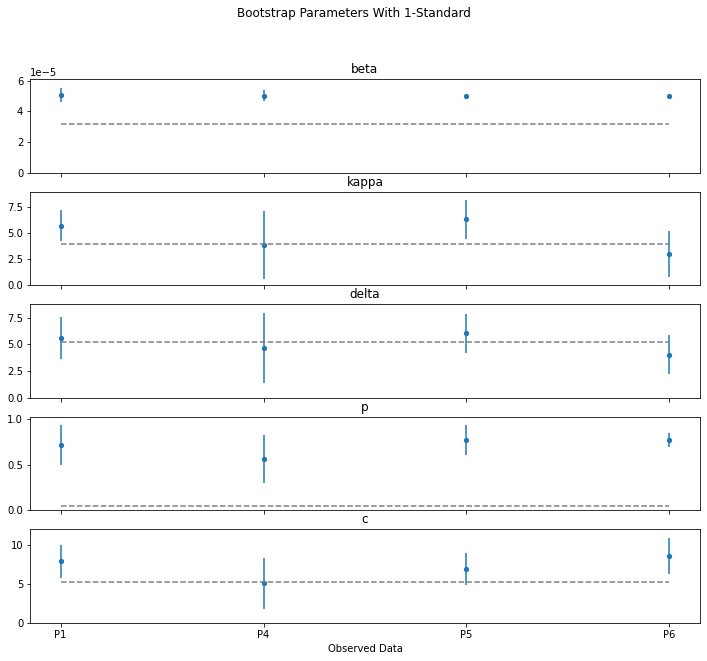

In [8]:
dirStudyPath = os.path.join(DIR, "ModelStudyFitters")

# Study of model fitting
study = ModelStudy(ANTIMONY_MODEL, dataSourceDct,
                  parameterDct=parameterDct,
                  dirStudyPath=dirStudyPath,
                  fittedDataTransformDct={"V": transformDataArr},
                  doSerialize=DO_SERIALIZE, useSerialized=USE_SERIALIZED)

study.bootstrap(numIteration=NUM_BOOTSTRAP_ITERATION)
study.plotFitAll()
study.plotParameterEstimates()


## SIR Model: $T \rightarrow I \rightarrow \emptyset$

Step 1 - step 3 are the same as before.

In [9]:
SIR_MODEL  = '''
    // Equations
    E1: T -> I ; beta*T*V ; // Target cells to exposed
    E3: -> V ; p*I ;        // Virus production by infected cells
    E4: V -> ; c*V ;        // Virus clearance
    E5: I -> ; delta*I      // Death of infected cells    

    // Parameters - from the Influenza article,
        
    beta = 3.2e-5;  // rate of transition of target(T) to exposed(E) cells, in units of 1/[V] * 1/day
    kappa = 4.0;    // rate of transition from exposed(E) to infected(I) cells, in units of 1/day
    delta = 5.2;    // rate of death of infected cells(I), in units of 1/day
    p = 4.6e-2;     // rate virus(V) producion by infected cells(I), in units of [V]/day
    c = 5.2;        // rate of virus clearance, in units of 1/day

    // Initial conditions
    T = 4E+8 // estimate of the total number of susceptible epithelial cells
             // in upper respiratory tract)
    I = 0
    V = 0.75 // the dose of virus in TCID50 in Influenza experiment; could be V=0 and I = 20 instead for a natural infection

'''

### Step 4: Run the model and produce plots



Doing bootstrapp for instance P1
5000 bootstrap estimates of parameters.


Doing bootstrapp for instance P2
12 bootstrap estimates of parameters.


Doing bootstrapp for instance P3
5000 bootstrap estimates of parameters.


Doing bootstrapp for instance P4
112 bootstrap estimates of parameters.


Doing bootstrapp for instance P5
28 bootstrap estimates of parameters.


Doing bootstrapp for instance P6
5000 bootstrap estimates of parameters.


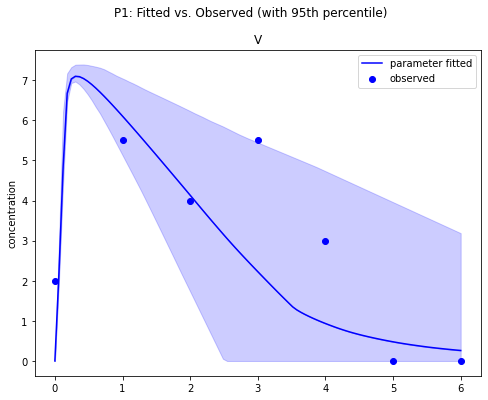

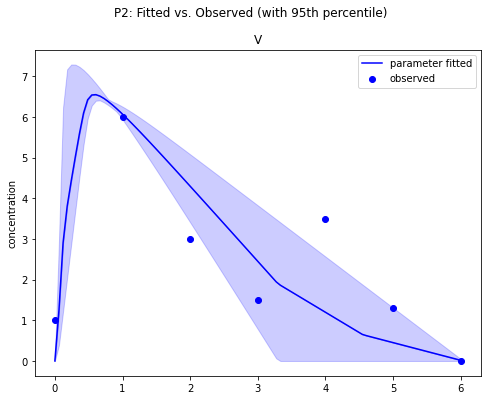

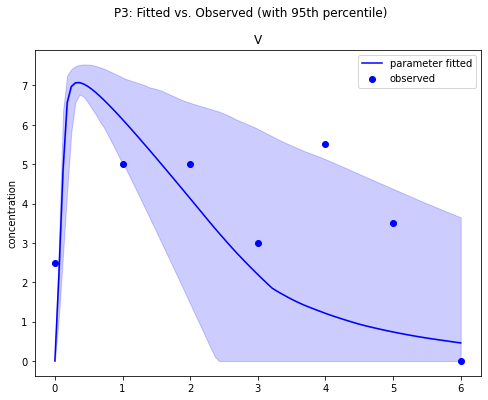

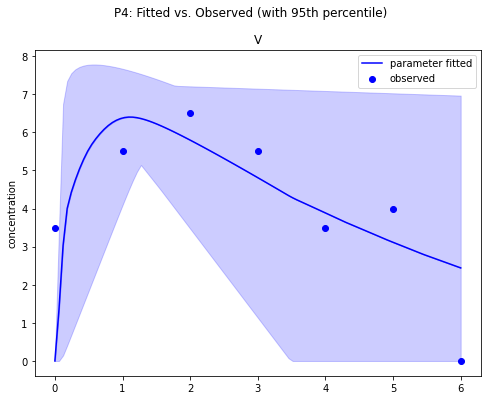

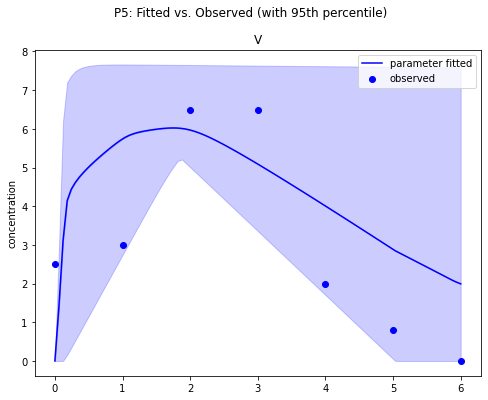

ValueError: Parameter 'c' has min == max

In [10]:
dirStudyPath = os.path.join(DIR, "SIRModelFitters")

# Study of model fitting
study = ModelStudy(SIR_MODEL, dataSourceDct,
                  parameterDct=parameterDct,
                  dirStudyPath=dirStudyPath,
                  fittedDataTransformDct={"V": transformDataArr},
                  doSerialize=DO_SERIALIZE, useSerialized=USE_SERIALIZED)

study.bootstrap(numIteration=NUM_BOOTSTRAP_ITERATION)
study.plotFitAll()
study.plotParameterEstimates()